In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# list files in directory
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'Employee_Compensation.csv',
 'sfo_employee_compensation_data.ipynb']

In [5]:
df = pd.read_csv("Employee_Compensation.csv", sep=",", error_bad_lines=False, index_col=False, dtype='unicode')

df.Salaries = pd.to_numeric(df.Salaries)

In [6]:
df_clean = df[(df['Year']=='2019') & (df['Year Type']=='Calendar') & (df['Salaries']>0)]\
.sort_values('Salaries', ascending=False)

#df_clean = df_clean[['Job Family', 'Job', 'Salaries']]

In [53]:
df_clean.sample(10)

,Job Family,Job,Salaries
581245,Fire Services,Firefighter,92129.19
868975,Purchasing & Storekeeping,Storekeeper,66459.01
700716,Housekeeping & Laundry,Custodian,63447.00
519829,Street Transit,"Manager IV, MTA",136160.00
736182,Untitled,Court Interpreter,83025.60
585312,Police Services,Police Officer,88203.13
857329,Human Services,Child Care Specialist,9519.71
597039,Untitled,Court Reporter,69750.00
544120,Police Services,Police Officer,63745.01
523690,Housekeeping & Laundry,Custodian,63439.91


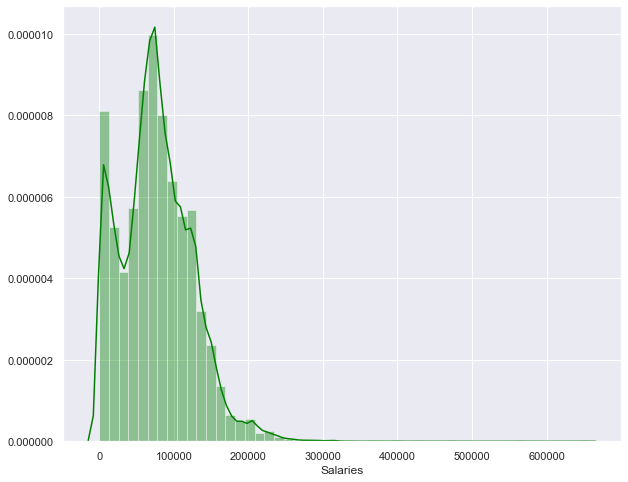

In [54]:
sns.set()
plt.figure(figsize=(10,8))

sns.distplot(df_clean['Salaries'], color='green')

plt.show()

In [55]:
df_clean.groupby('Job Family')['Job Family'].count().sort_values(ascending=False).reset_index(name='count').head(20)

,Job Family,count
0,Nursing,8388
1,Street Transit,6764
2,Police Services,5066
3,Journeyman Trade,4856
4,Human Services,4586
5,Fire Services,3568
6,"Clerical, Secretarial & Steno",3088
7,"Budget, Admn & Stats Analysis",2912
8,Housekeeping & Laundry,2706
9,Public Service Aide,2618


In [66]:
df_clean.groupby(['Job Family','Job'])['Salaries'].mean().sort_values(ascending=False).\
reset_index(name='average_salary').sample(20)

,Job Family,Job,average_salary
708,"Clerical, Secretarial & Steno",Shelter Office Asst Supv,68272.210000
919,Correction & Detention,"Counselor, Juvenile Hall PERS",46947.452000
152,Medical & Dental,Shelter Veterinarian,132040.295000
642,Human Services,Sen Hospital Eligibility Wrkr,73692.492824
903,Personnel,Human Resources Trainee,49337.900000
816,Housekeeping & Laundry,Custodial Supervisor,60364.505909
360,Public Safety Inspection,Senior Street Inspector,101610.807143
1002,Professional Engineering,City Planning Intern,20309.305000
692,Dietary & Food,Dietitian,69557.987391
773,Personnel,Human Resources Analyst,63162.297788


In [8]:
df_clean.to_csv("sfo_employee_comp.csv", sep=",")